# Example 01: General Use of XGBoostCVRegressor
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/regression/example_02_XGBoostCVRegressor.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [2]:
# Change path to project root
%cd ../..

/Users/atahmassebi/Desktop/AmirStuff/GitHub/slick-ml


### Import Python Libraries

In [3]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.regression import XGBoostCVRegressor

-----
# XGBoostCVRegressor Docstring

In [5]:
help(XGBoostCVRegressor)

Help on class XGBoostCVRegressor in module slickml.regression:

class XGBoostCVRegressor(XGBoostRegressor)
 |  XGBoostCVRegressor(num_boost_round=None, n_splits=None, metrics=None, early_stopping_rounds=None, random_state=None, shuffle=True, sparse_matrix=False, scale_mean=False, scale_std=False, importance_type=None, params=None, callbacks=False, verbose=True)
 |  
 |  XGBoost CV Regressor.
 |  This is subclass of XGBoostRegressor to run xgboost.cv()
 |  model with n-folds cross-validation and train model based on
 |  the best number of boosting round to avoid over-fitting. This
 |  function is pretty useful when feature selection is done and you
 |  want to train a model on the whole data and test on a separate
 |  validation set. In this case, cross-validation part on the train
 |  set decrease the possibility of over-fitting.
 |  run xgboost.train(). Main reference is XGBoost Python API:
 |  (https://xgboost.readthedocs.io/en/latest/python/python_api.html)
 |  
 |  Parameters
 |  -

## Example

In [6]:
# loading data; note this is a multi regression data
df = pd.read_csv("data/reg_data.csv")
df.head(2)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,TARGET1,TARGET2
0,1.138,1.543333,289964.0,22.491483,111.289667,7584.0,7584.0,737.156,561.15,823.713,109600.0,99800.0,594700.0,101900.0,0.07137,0.082,0.95,0.975
1,2.088,3.086667,6960180.0,22.936100,113.807817,28204.0,28204.0,908.551,561.15,854.808,133100.0,99800.0,728200.0,101900.0,0.10655,0.287,0.95,0.975


In [7]:
# define X, y based on one of the targets
y = df.TARGET1.values
X = df.drop(["TARGET1", "TARGET2"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=1367
)

In [9]:
# train a model
reg = XGBoostCVRegressor(num_boost_round=300, n_splits=4, metrics="mae")
reg.fit(X_train, y_train)

*-* Best Boosting Round = 299 -*- 4-Folds CV MAE: Train = 0.003 +/- 0.000 -*- Test = 0.004 +/- 0.000 *-*


In [10]:
# cv results or (reg.cv_results_)
reg.get_cv_results()

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.451242,0.000088,0.451242,0.000277
1,0.428683,0.000085,0.428683,0.000279
2,0.407253,0.000079,0.407252,0.000285
3,0.386891,0.000076,0.386891,0.000288
4,0.367552,0.000073,0.367552,0.000292
...,...,...,...,...
295,0.003425,0.000065,0.003532,0.000088
296,0.003419,0.000063,0.003527,0.000089
297,0.003411,0.000061,0.003518,0.000086
298,0.003403,0.000058,0.003511,0.000087


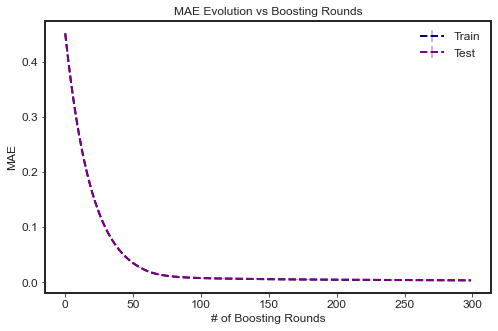

In [11]:
# plot cv results
reg.plot_cv_results()

In [12]:
# feature importrance (reg.get_feature_importance())
reg.feature_importance_

,feature,total_gain
0,F11,7.422260
1,F14,2.436510
2,F10,2.213100
3,F3,1.214443
4,F5,1.125346
5,F1,0.284697
6,F15,0.242902
7,F4,0.156218
8,F6,0.059491
9,F13,0.003088


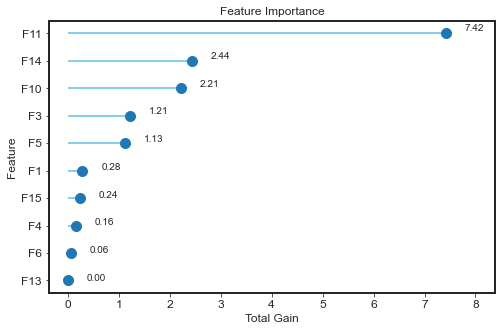

In [13]:
# plot feature importance
reg.plot_feature_importance()

In [14]:
# pred target values (or reg.y_pred_)
y_pred = reg.predict(X_test)
y_pred[:10]

array([0.9873427 , 0.9595486 , 0.9900251 , 0.98017603, 0.97277236,
       0.9722334 , 0.9681246 , 0.9873562 , 0.9897019 , 0.96931845],
      dtype=float32)

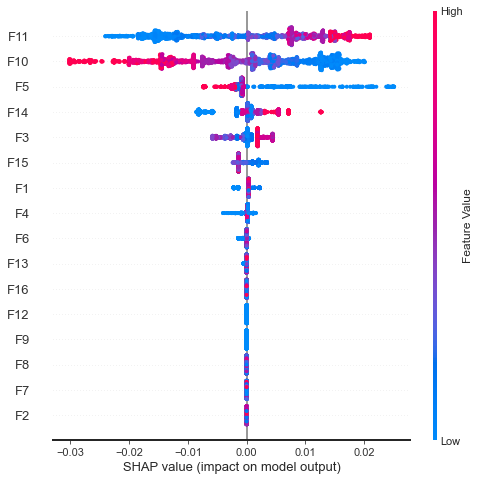

In [15]:
# shap summary plot of validation set
reg.plot_shap_summary(validation=True)

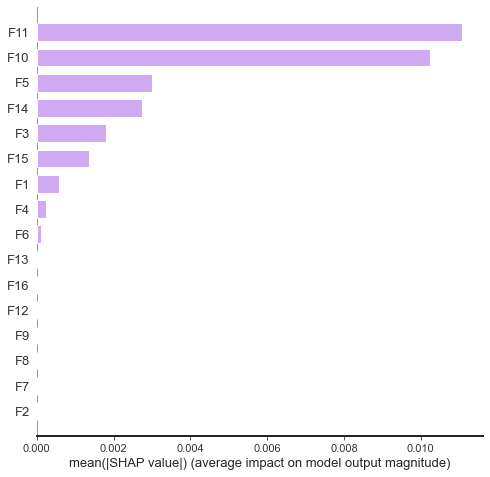

In [16]:
# shap summary bar plot of validation set
reg.plot_shap_summary(plot_type="bar")

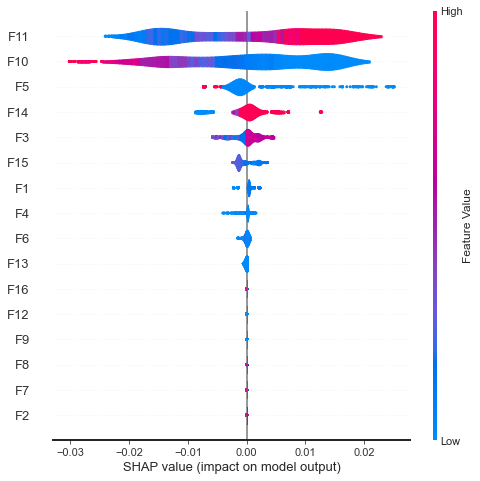

In [17]:
# shap summary plot (violin)
reg.plot_shap_summary(plot_type="violin")

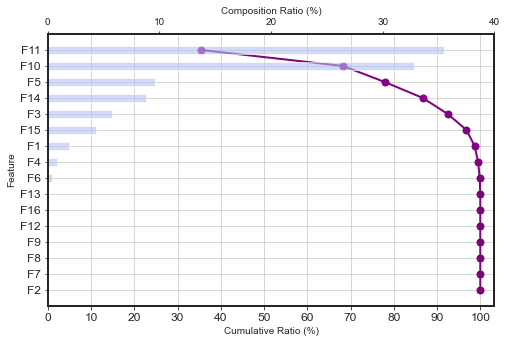

In [18]:
# plot shap waterfall plot
reg.plot_shap_waterfall()

## You can use the RegressionMetrics class to evaluate your model

In [19]:
from slickml.metrics import RegressionMetrics

reg_metrics = RegressionMetrics(y_test, y_pred)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.891000,0.891000,0.004000,0.000000,0.000000,0.004000,0.986000,0.005000,1.000000


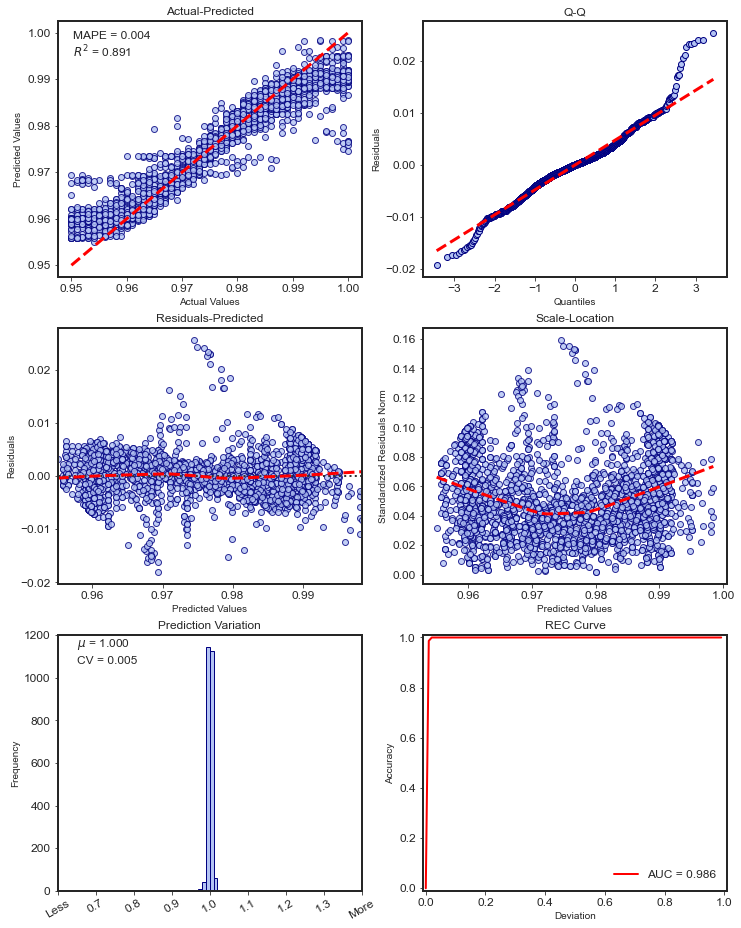

In [20]:
reg_metrics.plot()

In [21]:
# model's fitting params (or reg.get_params())
reg.get_params()

{'eval_metric': 'rmse',
 'tree_method': 'hist',
 'objective': 'reg:squarederror',
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1,
 'gamma': 0.0,
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'subsample': 0.9,
 'max_delta_step': 1,
 'verbosity': 0,
 'nthread': 4}